In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *

%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive



# PRONÓSTICO DEL CONSUMO DE ENERGÍA ELÉCTRICA RESIDENCIAL PARA CIUDADES USANDO LA TEMPERATURA, PRESION Y OTROS IMPORTANTES VALORES CLIMATICOS GRACIAS AL BIG DATA

## Objetivo General: 
*   ###  Elaborar un pronóstico de consumo residencial de energía eléctrica en diferentes ciudades de diferentes naciones (zona urbana) mediante la asociación de valores climaticos tomados de herramientas investigativas, matemáticas y computacionales gracias al BIG DATA

## Objetivo Especificos : 

*  ###   Desarrollar un modelo de proyección energética para una ciudad comprendiendo sus valores climaticos
*   ### Analizar los resultados para entender los factores que explican el comportamiento de la demanda de energía eléctrica en una ciudad.

## Motivación y Beneficios : 

*   ### Preocupacion y satisfaccion del derecho de uso de energia electrica por parte de cada ciudadano de cada nacion
*   ### Buscar satisfacer uso de energia electrica para una nacion para el buen desarrollo de la economia (Ej Venezuela donde no funciona la energia electrica)
* ### Uso de Datos de Big Data con variaciones en sus datos, por ejemplo ver Temperatura



*INFORMACION DEL DATAFRAME: Smart Home Dataset con información del clima*

*POTENCIAL APLICACION EN EL CONTEXTO LOCAL: Poder tener un almacenamiento de energia electrica alterno basado en un pronostico previo para la ciudad de Bucaramanga cuando se presente una catastrofe que destruya total o parcialmente los suministros convencionales de energia electricia (Ej: Medellin)*





## Descripcion del Dataset y Trabajo para los datos

In [4]:
d = pd.read_csv("drive/My Drive/IA/HomeC.csv")

# Encabezados
print " "
#print d.index
#print d.columns
print d.shape
print " "
#print d.info()

 
(503911, 32)
 


/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
d=d.rename(columns = {'time':'Tiempo','use [kW]':'Uso_kW','gen [kW]':'Total_Gen_kW','House overall [kW]':'Consumo_Casa',
                      'Dishwasher [kW]':'Lavavajillas_kW','Furnace 1 [kW]':'Horno1_kw','Furnace 2 [kW]':'Horno2_kW',
                      'Home office [kW]':'Oficina_en_casa_kW','Fridge [kW]':'Refrigerador_kW','Wine cellar [kW]':'Bodega_kW',
                     'Garage door [kW]':'Puerta_de_garaje_kW','Kitchen 12 [kW]':'Cocina12_kW','Kitchen 14 [kW]':'Cocina14_kW',
                      'Kitchen 38 [kW]':'Cocina38_kW','Barn [kW]':'Granero_kW','Well [kW]':'Pozo','Microwave [kW]':'Microondas_kW',
                      'Living room [kW]':'Sala_de_estar_kW','Solar [kW]':'Solar_Gen_kW','temperature':'Temperatura','icon':'Icono',
                      'humidity':'Humedad','visibility':'Visibilidad','summary':'Resumen','apparentTemperature':'Temperatura_aparente',
                      'pressure':'Presión','windSpeed':'Velocidad_del_viento','cloudCover':'Cubierto_de_nubes','windBearing':'teniendo_viento',
                      'precipIntensity':'Precipitancia','dewPoint':'Punto_de_rocío','PrecipProbability':'precipProbabilidad'})
d.head(1)

,Tiempo,Uso_kW,Total_Gen_kW,Consumo_Casa,Lavavajillas_kW,Horno1_kw,Horno2_kW,Oficina_en_casa_kW,Refrigerador_kW,Bodega_kW,Puerta_de_garaje_kW,Cocina12_kW,Cocina14_kW,Cocina38_kW,Granero_kW,Pozo,Microondas_kW,Sala_de_estar_kW,Solar_Gen_kW,Temperatura,Icono,Humedad,Visibilidad,Resumen,Temperatura_aparente,Presión,Velocidad_del_viento,Cubierto_de_nubes,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,1451624400,0.932833,0.003483,0.932833,0.000033,0.0207,0.061917,0.442633,0.12415,0.006983,0.013083,0.000417,0.00015,0.0,0.03135,0.001017,0.004067,0.001517,0.003483,36.14,clear-night,0.62,10.0,Clear,29.26,1016.91,9.18,cloudCover,282.0,0.0,24.4,0.0


In [0]:
d.head()

In [0]:
d=d[0:503910]

In [0]:
#Para darnos una idea

d[["Uso_kW","Temperatura"]].head(10)

,Uso_kW,Temperatura
0,0.932833,36.14
1,0.934333,36.14
2,0.931817,36.14
3,1.022050,36.14
4,1.139400,36.14
5,1.391867,36.14
6,1.366217,36.14
7,1.431900,36.14
8,1.627300,36.14
9,1.735383,36.14


In [0]:
del d['Tiempo']
del d['Icono']
del d['Resumen']
del d['Cubierto_de_nubes']

In [0]:
d.rolling(3).mean().head(10)

,Uso_kW,Total_Gen_kW,Consumo_Casa,Lavavajillas_kW,Horno1_kw,Horno2_kW,Oficina_en_casa_kW,Refrigerador_kW,Bodega_kW,Puerta_de_garaje_kW,Cocina12_kW,Cocina14_kW,Cocina38_kW,Granero_kW,Pozo,Microondas_kW,Sala_de_estar_kW,Solar_Gen_kW,Temperatura,Humedad,Visibilidad,Temperatura_aparente,Presión,Velocidad_del_viento,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.932994,0.003472,0.932994,0.000017,0.020706,0.062683,0.444256,0.123894,0.006983,0.013094,0.000422,0.000156,0.000006,0.031456,0.001011,0.004067,0.001606,0.003472,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
3,0.962733,0.003472,0.962733,0.000011,0.049439,0.064883,0.445572,0.123556,0.006983,0.013067,0.000428,0.000178,0.000006,0.031506,0.001011,0.004067,0.001639,0.003472,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
4,1.031089,0.003472,1.031089,0.000056,0.121511,0.064939,0.446394,0.123172,0.006939,0.012956,0.000439,0.000239,0.000006,0.031506,0.001011,0.004067,0.001617,0.003472,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
5,1.184439,0.003461,1.184439,0.000144,0.282361,0.065389,0.446717,0.122761,0.006850,0.012739,0.000456,0.000372,0.000000,0.031483,0.001017,0.004067,0.001594,0.003461,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
6,1.299161,0.003450,1.299161,0.000233,0.413194,0.063789,0.445611,0.122400,0.006767,0.012544,0.000483,0.000483,0.000000,0.031500,0.001022,0.004083,0.001567,0.003450,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
7,1.396661,0.003433,1.396661,0.000272,0.493506,0.102006,0.444861,0.122050,0.006744,0.012467,0.000494,0.000522,0.000000,0.031578,0.001028,0.004128,0.001556,0.003433,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
8,1.475139,0.003428,1.475139,0.000239,0.474972,0.202683,0.443006,0.121822,0.006822,0.012561,0.000489,0.000433,0.000006,0.031683,0.001028,0.004172,0.001550,0.003428,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
9,1.598194,0.003417,1.598194,0.000150,0.365689,0.408944,0.441494,0.121683,0.006989,0.012872,0.000439,0.000267,0.000006,0.031722,0.001022,0.004200,0.001578,0.003417,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


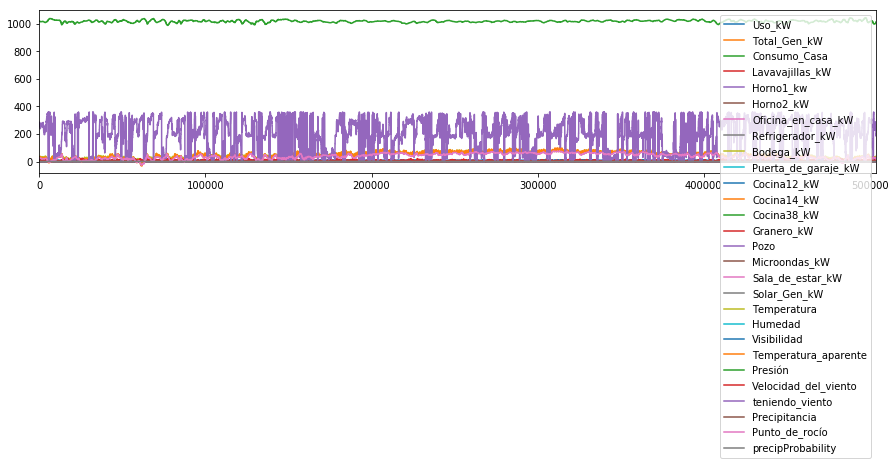

In [0]:
d.plot(figsize=(15,3))

In [0]:
d[["Uso_kW","Consumo_Casa"]].head(3)

,Uso_kW,Consumo_Casa
0,0.932833,0.932833
1,0.934333,0.934333
2,0.931817,0.931817


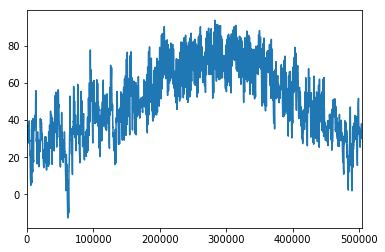

In [0]:
d.Temperatura.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f165f77d0>]],
      dtype=object)

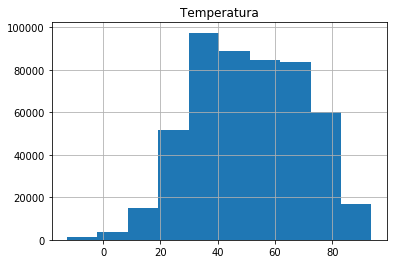

In [0]:
d.hist('Temperatura')

*(Se presenta temperaturas entre -17 a 32 grados Centrigados)*

In [0]:
d.Temperatura.unique()

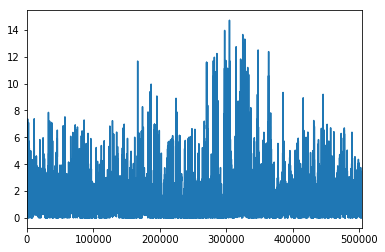

In [0]:
d.Uso_kW.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14cce450>]],
      dtype=object)

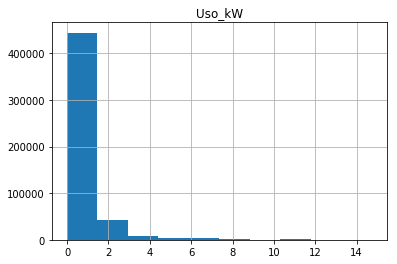

In [0]:
d.hist('Uso_kW')

In [0]:
d.Uso_kW.unique()

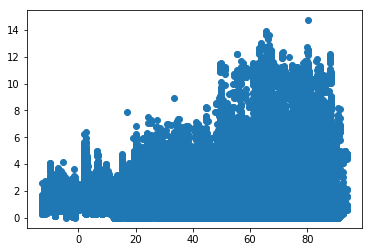

In [0]:
plt.scatter(d.Temperatura, d.Uso_kW)

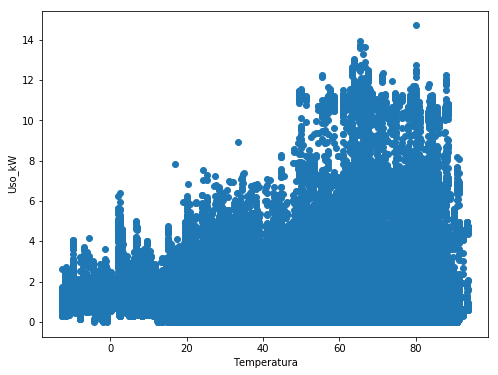

In [0]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(d['Temperatura'], d['Uso_kW'], 'o')
plt.xlabel('Temperatura')
plt.ylabel('Uso_kW')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14ab0550>,
      dtype=object)

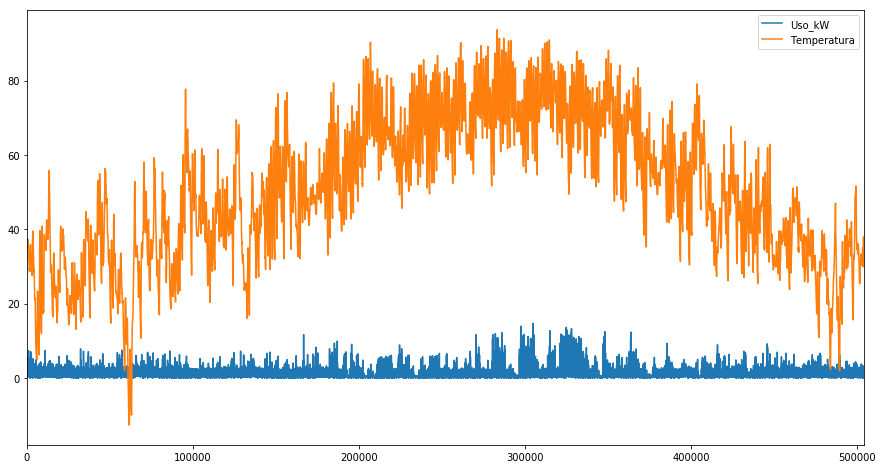

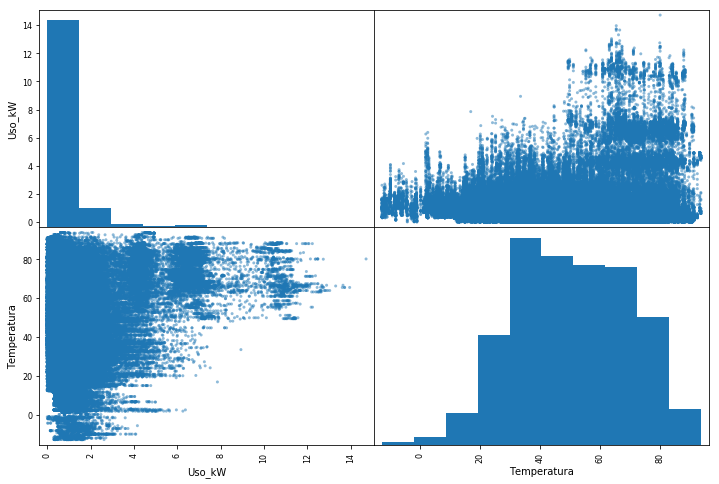

In [0]:
attributes = [ "Uso_kW", "Temperatura"]
d[attributes].plot(figsize=(15,8))
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

In [0]:
d[["Uso_kW","Temperatura"]].head(10)

**Más Plot¡**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14849590>,
      dtype=object)

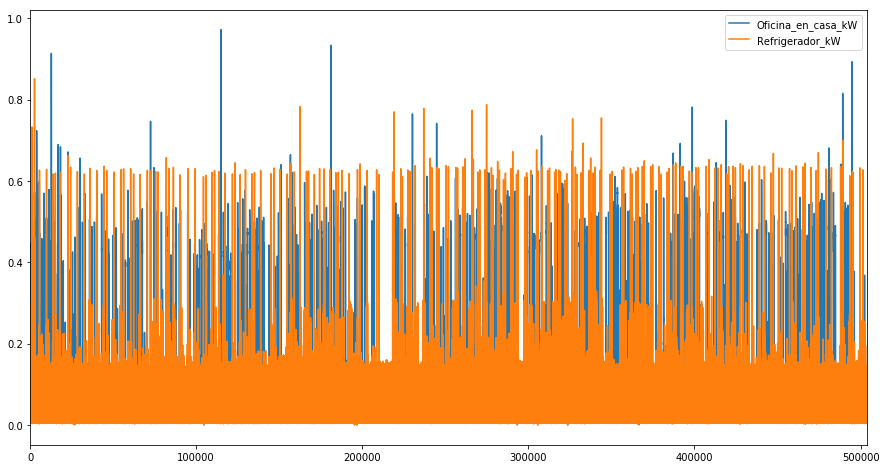

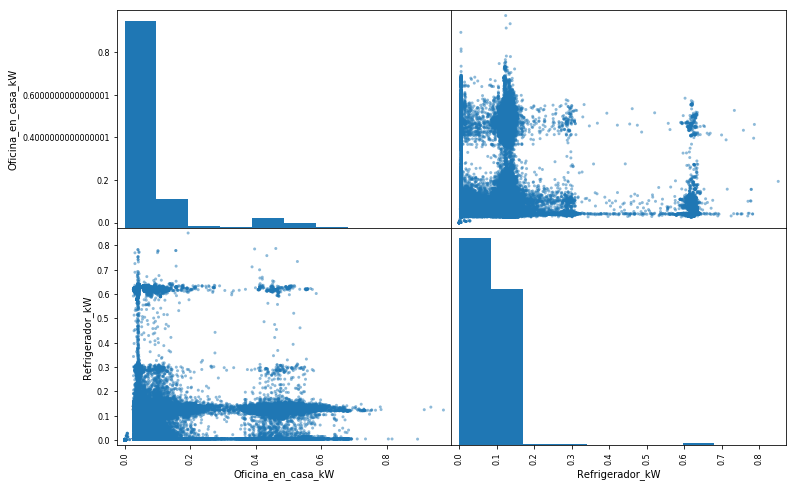

In [0]:
attributes = ["Oficina_en_casa_kW","Refrigerador_kW"]
d[attributes].plot(figsize=(15,8))
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14636550>,
      dtype=object)

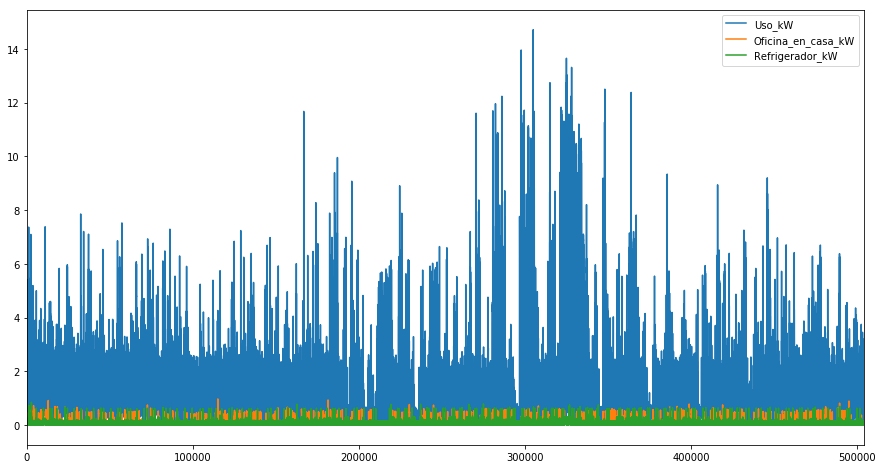

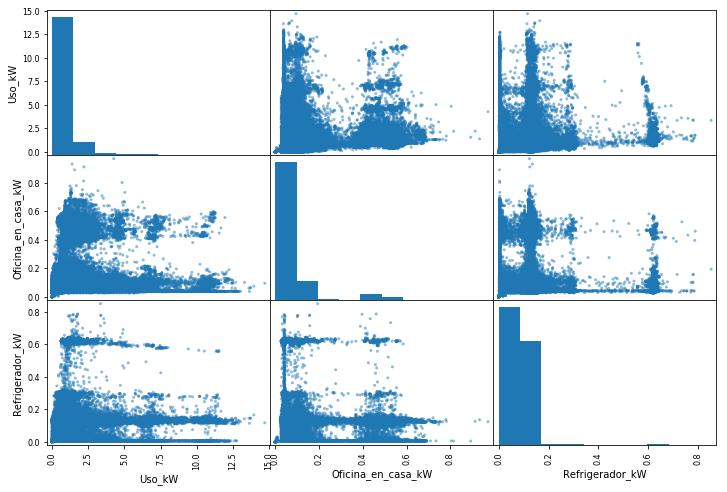

In [0]:
attributes = [ "Uso_kW","Oficina_en_casa_kW","Refrigerador_kW"]
d[attributes].plot(figsize=(15,8))
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14b05ed0>,
      dtype=object)

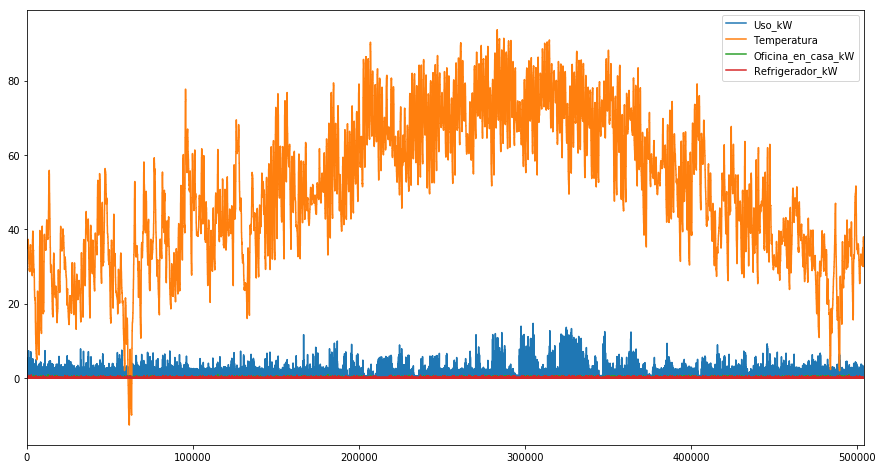

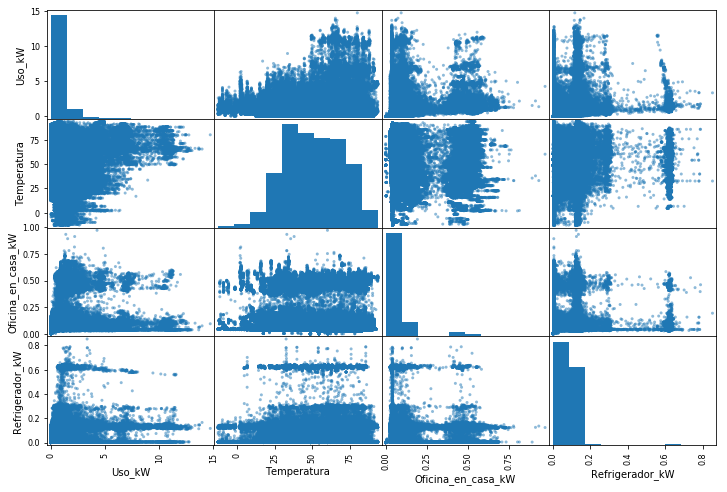

In [0]:
attributes = [ "Uso_kW", "Temperatura", "Oficina_en_casa_kW","Refrigerador_kW"]
d[attributes].plot(figsize=(15,8));
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

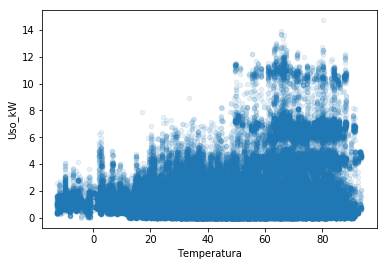

In [0]:
d.plot(kind="scatter", x="Temperatura", y="Uso_kW", alpha=0.1)

## Comparacion entre dos aparatos que usan un uso ALTO Y semejante energia electrica, Recordar de que no es mucha la relacion

,Uso_kW,Total_Gen_kW,Consumo_Casa,Lavavajillas_kW,Horno1_kw,Horno2_kW,Oficina_en_casa_kW,Refrigerador_kW,Bodega_kW,Puerta_de_garaje_kW,Cocina12_kW,Cocina14_kW,Cocina38_kW,Granero_kW,Pozo,Microondas_kW,Sala_de_estar_kW,Solar_Gen_kW,Temperatura,Humedad,Visibilidad,Temperatura_aparente,Presión,Velocidad_del_viento,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
1,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
3,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
4,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


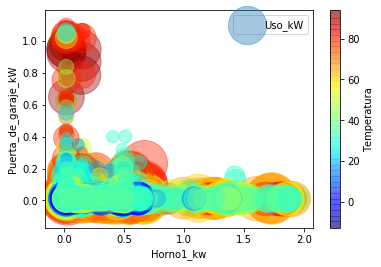

In [0]:
#VER PLOT DE LOS ATRIBUTOS
d.plot(kind="scatter", x="Horno1_kw", y="Puerta_de_garaje_kW", alpha=0.4, s=d["Uso_kW"]*200, 
             label="Uso_kW", c="Temperatura", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
d.head()

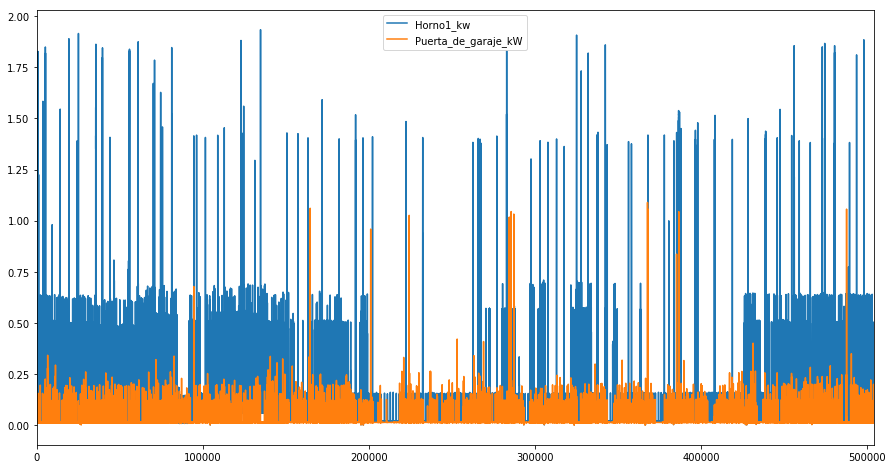

In [0]:
attributes = [ "Horno1_kw", "Puerta_de_garaje_kW"]
d[attributes].plot(figsize=(15,8))

## Comparacion entre un aparato con promedio ALTO de uso de energia electrica y otro que no

,Uso_kW,Total_Gen_kW,Consumo_Casa,Lavavajillas_kW,Horno1_kw,Horno2_kW,Oficina_en_casa_kW,Refrigerador_kW,Bodega_kW,Puerta_de_garaje_kW,Cocina12_kW,Cocina14_kW,Cocina38_kW,Granero_kW,Pozo,Microondas_kW,Sala_de_estar_kW,Solar_Gen_kW,Temperatura,Humedad,Visibilidad,Temperatura_aparente,Presión,Velocidad_del_viento,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
1,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
3,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
4,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


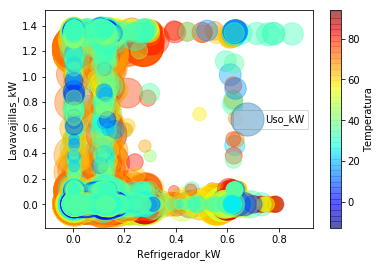

In [0]:
#VER PLOT DE LOS ATRIBUTOS
d.plot(kind="scatter", x="Refrigerador_kW", y="Lavavajillas_kW", alpha=0.4, s=d["Uso_kW"]*150, 
             label="Uso_kW", c="Temperatura", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
d.head()

In [0]:
d.Refrigerador_kW.unique()

In [0]:
d.Lavavajillas_kW.unique()

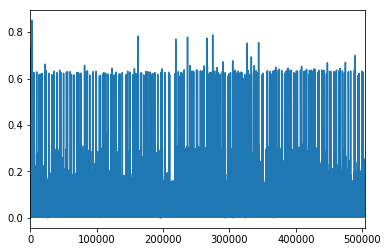

In [0]:
d.Refrigerador_kW.plot()

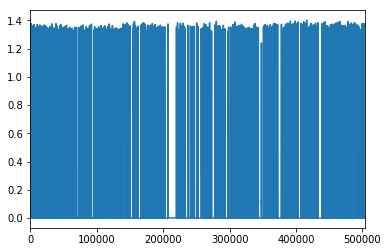

In [0]:
d.Lavavajillas_kW.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f14b0fa50>,
      dtype=object)

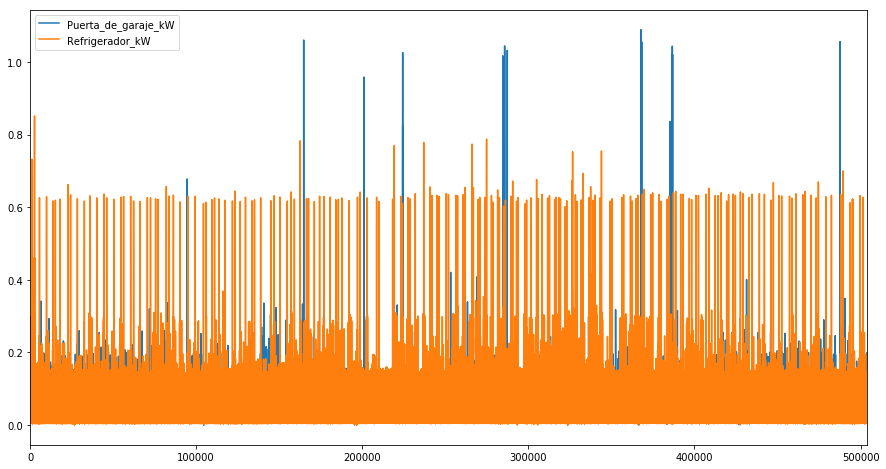

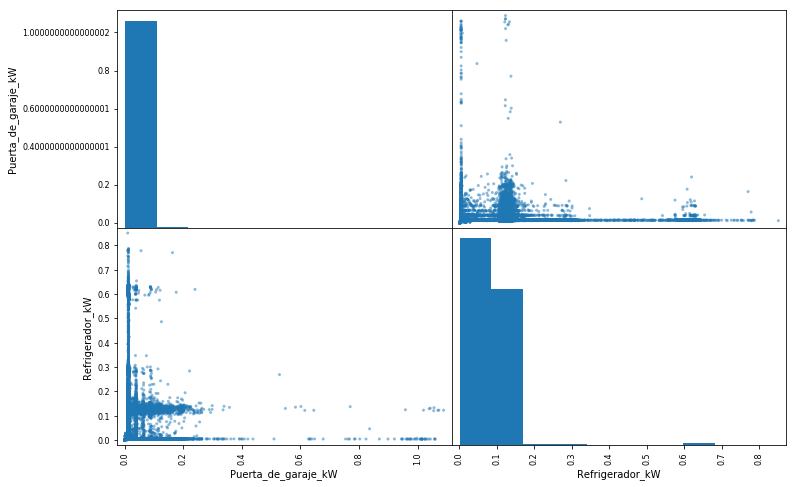

In [0]:
attributes = [ "Refrigerador_kW", "Lavavajillas_kW"]
d[attributes].plot(figsize=(15,8))
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

,Uso_kW,Total_Gen_kW,Consumo_Casa,Lavavajillas_kW,Horno1_kw,Horno2_kW,Oficina_en_casa_kW,Refrigerador_kW,Bodega_kW,Puerta_de_garaje_kW,Cocina12_kW,Cocina14_kW,Cocina38_kW,Granero_kW,Pozo,Microondas_kW,Sala_de_estar_kW,Solar_Gen_kW,Temperatura,Humedad,Visibilidad,Temperatura_aparente,Presión,Velocidad_del_viento,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
1,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
3,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
4,1.139400,0.003467,1.139400,0.000133,0.236933,0.063983,0.446533,0.122850,0.006850,0.012783,0.000450,0.000333,0.000000,0.031500,0.001017,0.004067,0.001583,0.003467,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


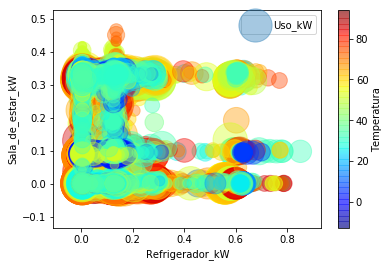

In [0]:
#Comparacion entre dos aparatos con promedio BAJO de uso de energia electrica

#VER PLOT DE LOS ATRIBUTOS, vemos la relacion, que hay mas azul y menos rojo y amarillo en los extremos,
#recordamos que no es mucha la relacion

d.plot(kind="scatter", x="Refrigerador_kW", y="Sala_de_estar_kW", alpha=0.4, s=d["Uso_kW"]*150, 
             label="Uso_kW", c="Temperatura", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()
d.head()

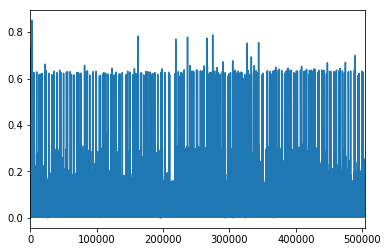

In [0]:
d.Refrigerador_kW.plot()

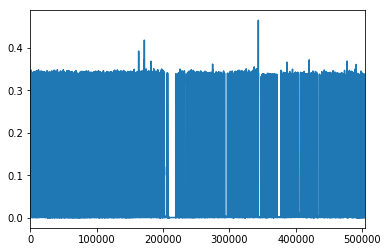

In [0]:
d.Sala_de_estar_kW.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6f120e40d0>,
      dtype=object)

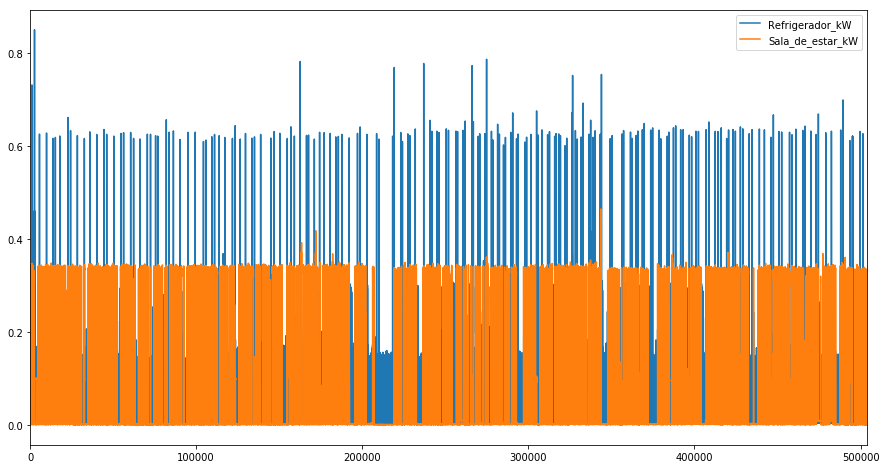

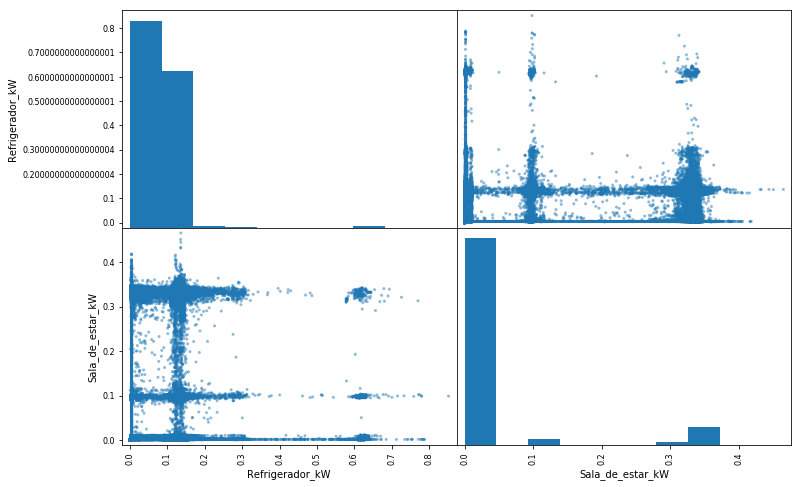

In [0]:
attributes = [ "Refrigerador_kW", "Sala_de_estar_kW"]
d[attributes].plot(figsize=(15,8))
pd.plotting.scatter_matrix(d[attributes], figsize=(12,8))

## MSE Y PREDICCIONES

In [0]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503911 entries, 0 to 503910
Data columns (total 28 columns):
Uso_kW                  503910 non-null float64
Total_Gen_kW            503910 non-null float64
Consumo_Casa            503910 non-null float64
Lavavajillas_kW         503910 non-null float64
Horno1_kw               503910 non-null float64
Horno2_kW               503910 non-null float64
Oficina_en_casa_kW      503910 non-null float64
Refrigerador_kW         503910 non-null float64
Bodega_kW               503910 non-null float64
Puerta_de_garaje_kW     503910 non-null float64
Cocina12_kW             503910 non-null float64
Cocina14_kW             503910 non-null float64
Cocina38_kW             503910 non-null float64
Granero_kW              503910 non-null float64
Pozo                    503910 non-null float64
Microondas_kW           503910 non-null float64
Sala_de_estar_kW        503910 non-null float64
Solar_Gen_kW            503910 non-null float64
Temperatura             5

In [0]:
#X = d.values[:,:-1]
#y = d.values[:,-1]

X = d.values[:,[18,19,20,21,22,23,24,25,26,27]]
y = d.values[:,0]

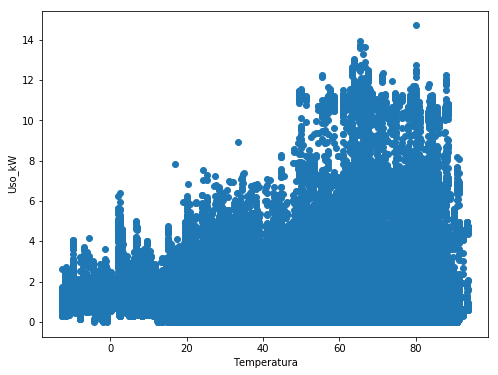

In [0]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(d['Temperatura'], d['Uso_kW'], 'o')
plt.xlabel('Temperatura')
plt.ylabel('Uso_kW')
plt.show()

In [0]:
d[["Uso_kW","Temperatura","Humedad","Visibilidad","Temperatura_aparente","Presión","Velocidad_del_viento","teniendo_viento","Precipitancia", "Punto_de_rocío","precipProbability"]].head(5)

,Uso_kW,Temperatura,Humedad,Visibilidad,Temperatura_aparente,Presión,Velocidad_del_viento,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,0.932833,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
1,0.934333,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
2,0.931817,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
3,1.022050,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0
4,1.139400,36.14,0.62,10.0,29.26,1016.91,9.18,282.0,0.0,24.4,0.0


In [0]:
 d[(d.Temperatura>0) & (d.Uso_kW<1.1)]

,Uso_kW,Total_Gen_kW,Consumo_Casa,Lavavajillas_kW,Horno1_kw,Horno2_kW,Oficina_en_casa_kW,Refrigerador_kW,Bodega_kW,Puerta_de_garaje_kW,Cocina12_kW,Cocina14_kW,Cocina38_kW,Granero_kW,Pozo,Microondas_kW,Sala_de_estar_kW,Solar_Gen_kW,Temperatura,Humedad,Visibilidad,Temperatura_aparente,Presión,Velocidad_del_viento,teniendo_viento,Precipitancia,Punto_de_rocío,precipProbability
0,0.932833,0.003483,0.932833,0.000033,0.020700,0.061917,0.442633,0.124150,0.006983,0.013083,0.000417,0.000150,0.000000,0.031350,0.001017,0.004067,0.001517,0.003483,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
1,0.934333,0.003467,0.934333,0.000000,0.020717,0.063817,0.444067,0.124000,0.006983,0.013117,0.000417,0.000150,0.000000,0.031500,0.001017,0.004067,0.001650,0.003467,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
2,0.931817,0.003467,0.931817,0.000017,0.020700,0.062317,0.446067,0.123533,0.006983,0.013083,0.000433,0.000167,0.000017,0.031517,0.001000,0.004067,0.001650,0.003467,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
3,1.022050,0.003483,1.022050,0.000017,0.106900,0.068517,0.446583,0.123133,0.006983,0.013000,0.000433,0.000217,0.000000,0.031500,0.001017,0.004067,0.001617,0.003483,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
13,0.840583,0.003433,0.840583,0.000000,0.020950,0.144800,0.444783,0.035017,0.007033,0.013183,0.000650,0.000183,0.000017,0.031783,0.001017,0.004217,0.001617,0.003433,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
14,0.703200,0.003433,0.703200,0.000017,0.020733,0.061967,0.443833,0.004783,0.006967,0.013117,0.000733,0.000233,0.000000,0.031750,0.001017,0.004233,0.001550,0.003433,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
15,0.571883,0.003450,0.571883,0.000000,0.020650,0.063650,0.307783,0.004917,0.007050,0.013100,0.000733,0.000150,0.000000,0.031733,0.001000,0.004217,0.001583,0.003450,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
16,0.485733,0.003450,0.485733,0.000017,0.020617,0.063433,0.220450,0.004983,0.007033,0.013117,0.000750,0.000083,0.000000,0.031833,0.001000,0.004233,0.001617,0.003450,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
17,0.523167,0.003433,0.523167,0.000000,0.020633,0.062117,0.260050,0.004950,0.007000,0.013083,0.000733,0.000100,0.000017,0.031850,0.001017,0.004250,0.001717,0.003433,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00
18,0.536200,0.003450,0.536200,0.000000,0.020683,0.062917,0.272067,0.004950,0.007033,0.013150,0.000733,0.000117,0.000000,0.031867,0.001017,0.004233,0.001650,0.003450,36.14,0.62,10.00,29.26,1016.91,9.18,282.0,0.0000,24.40,0.00


###Esto quiere decir que de 500000 datos, casi la totalidad, aprox. 80 por ciento de los datos, tienen una cantidad de uso_kW menor que 1.1 kW con una temperatura mayor a 0 Grados Farenheit , esto es 0.2 0.8 1. 1.2
###Asi logramos comprender los resultados de los predict seguientes al haber la mayoria de datos dentro del mencionado intervalo

In [12]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressorSA = DecisionTreeRegressor(max_depth=50) #50 de max de profundi
regressor.fit(np.array([d['Temperatura']]).T, d['Uso_kW'])
regressorSA.fit(np.array([d['Temperatura']]).T, d['Uso_kW'])

DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
np.array([d['Temperatura']]).T

array([[36.14],
       [36.14],
       [36.14],
       ...,
       [35.12],
       [35.12],
       [35.12]])

In [8]:
regressor.predict([[0]]) # -17.77 Grados Centigrados

array([0.93101815])

In [9]:
regressor.predict([[20]]) # -6.66 Grados Centigrados

array([0.93101815])

In [0]:
regressor.predict([[40]]) # 4.44 Grados Centigrados

array([0.79186979])

In [0]:
regressor.predict([[60]]) # 15.55 Grados Centigrados

array([0.79186979])

In [0]:
regressor.predict([[80]]) # 26.66 Grados Centigrados

array([1.13133015])

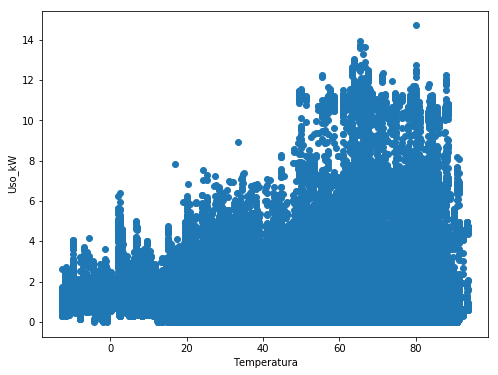

In [0]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(d['Temperatura'], d['Uso_kW'], 'o')
plt.xlabel('Temperatura')
plt.ylabel('Uso_kW')
plt.show()

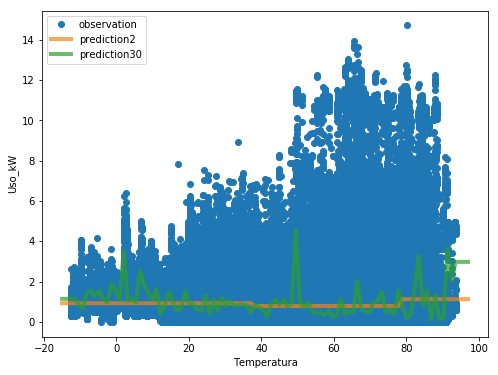

In [0]:
xx = np.array([np.linspace(-15, 97, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(d['Temperatura'], d['Uso_kW'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction2')
plt.plot(xx, regressorSA.predict(xx), linewidth=4, alpha=.7, label='prediction30')
plt.xlabel('Temperatura')
plt.ylabel('Uso_kW')
plt.legend()
plt.show()

In [17]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

regressor = DecisionTreeRegressor(max_depth=2)
s = cross_val_score(regressor, np.array([d['Temperatura']]).T, d['Uso_kW'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE depth: 2 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

s = cross_val_score(regressorSA, np.array([d['Temperatura']]).T, d['Uso_kW'], cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE depth: 50 %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

MSE depth: 2 1.106 (+/- 0.03035)
MSE depth: 50 0.732 (+/- 0.01493)


In [0]:
from sklearn.svm import SVR
est = SVR()
s = cross_val_score(est, np.array([d['Temperatura']]).T, d['Uso_kW'],  cv=KFold(10, shuffle=True), scoring=make_scorer(mean_squared_error))
print "MSE %.3f (+/- %.5f)"%(np.mean(s), np.std(s))

In [0]:
plt.figure(figsize=(20,3))
preds = est.predict(Xts)
errs  = np.abs(yts - preds)
perm = np.random.permutation(range(len(yts)))[:40]
plt.bar(range(len(perm)), yts[perm], 0.5, yerr = errs[perm], color="blue", alpha=.5)
plt.xlim(-1,len(perm))
plt.title("showing only some random %d test elements (BLACK line is error)"%len(perm))

In [0]:
def show_curve(est):
    means, stds = [], []
    nfolds_range = range(2,11)
    for nfolds in nfolds_range:
        print nfolds,
        s = cross_val_score(est, X, y, cv=KFold(nfolds, shuffle=True), scoring=make_scorer(mean_squared_error))
        means.append(np.mean(s))
        stds.append(np.std(s))

    means = np.r_[means]
    stds  = np.r_[stds]

    plt.plot(nfolds_range, means, label="mean", color="black")
    plt.fill_between(nfolds_range, means-stds, means+stds, color="blue", alpha=.5, label="std")
    plt.xlabel("n folds")
    plt.ylabel("performance")
    plt.legend()

In [0]:
show_curve(DecisionTreeRegressor())

In [0]:
show_curve(SVR())

In [0]:
from sklearn.ensemble import RandomForestRegressor
show_curve(RandomForestRegressor())

In [13]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import *


print "MSE 2 depth %.3f"% mean_squared_error(d['Temperatura'], regressor.predict(np.array([d['Uso_kW']]).T))
print "MSE 50 depth %.3f"% mean_squared_error(d['Temperatura'], regressorSA.predict(np.array([d['Uso_kW']]).T))



MSE 2 depth 2846.464
MSE 50 depth 2791.915


In [0]:
from sklearn.ensemble import RandomForestRegressor
dt =RandomForestRegressor()
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(np.array([d['Temperatura']]).T, d['Uso_kW'], test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.34073908341773873


*Regresion (tendencia de una medición extrema a presentarse más cercana a la media en una segunda medición) de los datos en Temperatura*

In [0]:
from sklearn.tree import export_graphviz
export_graphviz(regressor, out_file='tree.dot', feature_names=['Temperatura'])

In [0]:
!dot -Tpng tree.dot > tree2.png

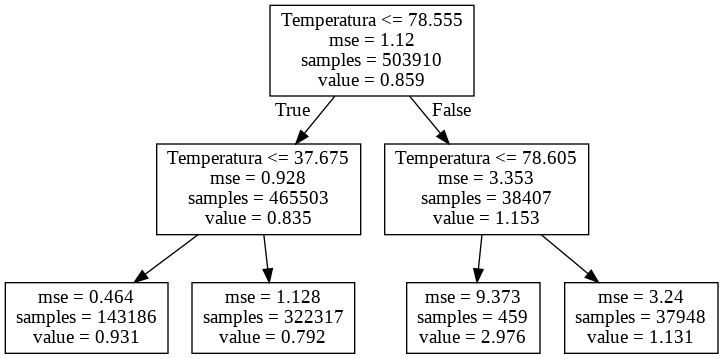

In [0]:
from IPython.display import Image
Image(filename='tree2.png') 

# Predicción de datos

In [47]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 28 columns):
Uso_kW                  503910 non-null float64
Total_Gen_kW            503910 non-null float64
Consumo_Casa            503910 non-null float64
Lavavajillas_kW         503910 non-null float64
Horno1_kw               503910 non-null float64
Horno2_kW               503910 non-null float64
Oficina_en_casa_kW      503910 non-null float64
Refrigerador_kW         503910 non-null float64
Bodega_kW               503910 non-null float64
Puerta_de_garaje_kW     503910 non-null float64
Cocina12_kW             503910 non-null float64
Cocina14_kW             503910 non-null float64
Cocina38_kW             503910 non-null float64
Granero_kW              503910 non-null float64
Pozo                    503910 non-null float64
Microondas_kW           503910 non-null float64
Sala_de_estar_kW        503910 non-null float64
Solar_Gen_kW            503910 non-null float64
Temperatura             5

In [0]:
#X = d.values[:,:-1]
#y = d.values[:,-1]

X = d.values[:,[19]]
y = d.values[:,[0]]

In [41]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()
est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:200]
print "first 100 targets    ", y[:200]


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


first 100 predictions [0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334 0.81457334
 0.81457334 0.81457334 0.81457334 0.81457334 0.80011055 0.80011055
 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055
 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055
 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055
 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055 0.80011055
 0.80011055 0.80011055 0.80011055 0.8001

In [42]:
## Individual predictions
pred = est.predict(X[0].reshape(1,-1))
print("the number predicted is: ", pred.argmax())
print("valor predicho:", np.max(pred[0]),
      "ground truth: ", y[0])

('the number predicted is: ', 0)
('valor predicho:', 0.8145733406909242, 'ground truth: ', array([0.93283333]))


In [45]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503910 entries, 0 to 503909
Data columns (total 28 columns):
Uso_kW                  503910 non-null float64
Total_Gen_kW            503910 non-null float64
Consumo_Casa            503910 non-null float64
Lavavajillas_kW         503910 non-null float64
Horno1_kw               503910 non-null float64
Horno2_kW               503910 non-null float64
Oficina_en_casa_kW      503910 non-null float64
Refrigerador_kW         503910 non-null float64
Bodega_kW               503910 non-null float64
Puerta_de_garaje_kW     503910 non-null float64
Cocina12_kW             503910 non-null float64
Cocina14_kW             503910 non-null float64
Cocina38_kW             503910 non-null float64
Granero_kW              503910 non-null float64
Pozo                    503910 non-null float64
Microondas_kW           503910 non-null float64
Sala_de_estar_kW        503910 non-null float64
Solar_Gen_kW            503910 non-null float64
Temperatura             5

In [0]:
#X = d.values[:,:-1]
#y = d.values[:,-1]

X = d.values[:,[18,19,20,21,22,23,24,25,26,27]]
y = d.values[:,[0]]

In [44]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()
est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:200]
print "first 100 targets    ", y[:200]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


first 100 predictions [1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  1.0596589  1.0596589
 1.0596589  1.0596589  1.0596589  1.0596589  0.90954106 0.90954106
 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106
 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106
 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106
 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106 0.90954106
 0.90954106 0.90954106 0.90954106 0.90954106 0.90

In [46]:
## Individual predictions
pred = est.predict(X[0].reshape(1,-1))
print("the number predicted is: ", pred.argmax())
print("valor predicho:", np.max(pred[0]),
      "ground truth: ", y[0])

('the number predicted is: ', 0)
('valor predicho:', 1.0596589013260194, 'ground truth: ', array([0.93283333]))


In [0]:
X = d.values[:,[0]]
y = d.values[:,[19]]

In [51]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()
est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:200]
print "first 100 targets    ", y[:200]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


first 100 predictions [0.63149432 0.62160119 0.57564394 0.75612143 0.57622381 0.699
 0.50503571 0.506      0.5242     0.651      0.64025    0.64
 0.6315     0.65465866 0.61343665 0.72844127 0.59755631 0.65587469
 0.58145007 0.65380786 0.70254652 0.74044783 0.72484484 0.60483333
 0.656      0.640125   0.511      0.6925     0.6400631  0.57273647
 0.74231548 0.59690714 0.69913333 0.66955556 0.41805    0.56119773
 0.57766667 0.61838095 0.6855     0.5848     0.384      0.65933333
 0.72788333 0.67547619 0.64140357 0.67233494 0.61525794 0.73637698
 0.52642143 0.718475   0.60034825 0.79698846 0.62866667 0.70566667
 0.6708     0.69863333 0.69618333 0.66121429 0.71408095 0.56411046
 0.59931872 0.64624075 0.7079596  0.63074087 0.64113333 0.66781667
 0.70290476 0.66085317 0.574575   0.70143333 0.65529242 0.67848333
 0.55166667 0.70259286 0.77041667 0.82841667 0.59904286 0.80116667
 0.56623333 0.67515    0.67394242 0.7208     0.69327381 0.72235043
 0.61133333 0.71048016 0.63598139 0.51316667 0.5313

In [52]:
## Individual predictions
pred = est.predict(X[0].reshape(1,-1))
print("the number predicted is: ", pred.argmax())
print("valor predicho:", np.max(pred[0]),
      "ground truth: ", y[0])

('the number predicted is: ', 0)
('valor predicho:', 0.6314943181818181, 'ground truth: ', array([0.62]))


In [0]:
X = d.values[:,[0,18,20,21,22,23,24,25,26,27]]
y = d.values[:,[19]]

In [54]:
from sklearn.ensemble import RandomForestRegressor

est = RandomForestRegressor()
est.fit(X,y)
predictions = est.predict(X)
print "first 100 predictions", predictions[:200]
print "first 100 targets    ", y[:200]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


first 100 predictions [0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62 0.62
 0.62 0.62 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61 0.61
 0.61 0.61 0.61 0.61 0.61 0.61 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64
 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64

In [55]:
## Individual predictions
pred = est.predict(X[0].reshape(1,-1))
print("the number predicted is: ", pred.argmax())
print("valor predicho:", np.max(pred[0]),
      "ground truth: ", y[0])

('the number predicted is: ', 0)
('valor predicho:', 0.6199999999999998, 'ground truth: ', array([0.62]))
